In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os
import warnings
from tqdm import tqdm
# import Counter

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

import time
import calendar
import datetime

warnings.filterwarnings("ignore")

bus_bts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/bus_bts.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/train.csv')

# location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/study_data/229255_bus_riders_at_rush_hour_data/행정_법정동 중심좌표.@@')

In [3]:
# 한글폰트 사용 in colab

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [4]:
plt.rcParams["figure.figsize"] = (15, 10)

# #1. EDA

## train 데이터

In [5]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

### <1> datetime

In [7]:
train['date_dt'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             415423 non-null  int64         
 1   date           415423 non-null  object        
 2   bus_route_id   415423 non-null  int64         
 3   in_out         415423 non-null  object        
 4   station_code   415423 non-null  int64         
 5   station_name   415423 non-null  object        
 6   latitude       415423 non-null  float64       
 7   longitude      415423 non-null  float64       
 8   6~7_ride       415423 non-null  float64       
 9   7~8_ride       415423 non-null  float64       
 10  8~9_ride       415423 non-null  float64       
 11  9~10_ride      415423 non-null  float64       
 12  10~11_ride     415423 non-null  float64       
 13  11~12_ride     415423 non-null  float64       
 14  6~7_takeoff    415423 non-null  float64       
 15  

#### (1) 주 차

In [8]:
## 몇 째주인지
week_list = []

for j in range(len(train)):
  date_i = train['date_dt'][j]
  week = date_i.strftime('%W')
  week_list.append(week)

train['Week'] = week_list
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34


In [9]:
print(train.Week.nunique(), "주로 이뤄져있음")
print(calendar.month(2019, 9))

6 주로 이뤄져있음
   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



#### (2) 요일

In [10]:
## 무슨 요일인지 (월요일 == 0)
weekday_list = []

for i in range(len(train)):
  date_i = train['date_dt'][i]
  weekday = date_i.weekday()
  weekday_list.append(weekday)

train['Weekdays'] = weekday_list
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


In [11]:
## 주중과 주말 분류
weekend = train[train['Weekdays'].isin([5, 6])]
weekday = train[train['Weekdays'].isin([0, 1, 2, 3, 4])]
weekend.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


## bus_bts 데이터

In [12]:
bus_bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [13]:
bus_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


In [14]:
bus_bts.apply(lambda x: pd.isna(x).sum())

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

In [15]:
## datetime으로 변환
bus_bts['geton_date_dt'] = pd.to_datetime(bus_bts['geton_date'], format="%Y-%m-%d")
bus_bts['getoff_date_dt'] = pd.to_datetime(bus_bts['getoff_date'], format="%Y-%m-%d")
# bus_bts['geton_time'] = pd.to_datetime(bus_bts['geton_time'], format="%H:%M:%S")
# bus_bts['getoff_time'] = pd.to_datetime(bus_bts['getoff_time'], format="%H:%M:%S")
bus_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_card_id         float64       
 1   bus_route_id         int64         
 2   vhc_id               int64         
 3   geton_date           object        
 4   geton_time           object        
 5   geton_station_code   int64         
 6   geton_station_name   object        
 7   getoff_date          object        
 8   getoff_time          object        
 9   getoff_station_code  float64       
 10  getoff_station_name  object        
 11  user_category        int64         
 12  user_count           int64         
 13  geton_date_dt        datetime64[ns]
 14  getoff_date_dt       datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(6)
memory usage: 275.7+ MB


# #2. 문제제기 및 가설 설정

**[문제] 제주도 버스의 효율적인 운행를 위해 퇴근시간 승차인원을 예측하는 모델**

> 가설1: 제주도의 교통체증이 발생하는 이유는 관광객과 거주민 노선이 겹치기 때문이다.
1. 휴일(추석, 한글날, 개천절)엔 거주민보다 관광객 활동이 두드러질 것으로 예상
  - 휴일기간 동안 버스 승차 인원이 많은 특정 장소, 요일, 시간대를 관광객 활동으로 가정
  - 휴일: 2019-9-12 ~ 2019-9-14 목/토 (추석), 2019-10-3 목요일(개천절), 2019-10-9 수요일(한글날)
      * 앞뒤 주말끼는지 확인: 2019-9-15 일
      * 수요일 저녁 타임 확인하기(공항 승차인원 많을 것 같다!)
2.  승하차 인원이 많은 역과 시간 파악 ==> 관광객 패턴 파악
      * (1) 많이 승하차하는 정류소(노선) 어디인지 ==> 숙소? 관광지? 관광코스?
      * (2) 많이 승하차하는 시간 ==> 언제 관광하는지 ==> 오전에 숙소에서 출발하면 몇시부터 관광하는지?
      * (3) 많이 승하차하는 버스카드 ID ==> 관광객?
3. 주중(클러스터링)이랑 비교


## [1] 승하차 시간으로 군집화 후, 각 집단의 특징 정의

### (1) 클러스터링

#### a. 전처리

In [16]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,date_dt,Week,Weekdays
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01,34,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2019-09-01,34,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-09-01,34,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2019-09-01,34,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-09-01,34,6


In [17]:
## train 승하차인원 melt
train_melt = pd.melt(train, id_vars=['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
        'date_dt', 'Week', 'Weekdays'], var_name='x~y_ride', value_name='ride_passen')
train_melt = pd.melt(train_melt, id_vars=['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'date_dt', 'Week', 'Weekdays', 'x~y_ride', 'ride_passen'], var_name='x~y_takeoff', value_name='takeoff_passen')
train_melt.head()
train_melt.shape

(17447766, 15)

In [18]:
train_melt

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17447761,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,2019-09-30,39,0,18~20_ride,0.0,11~12_takeoff,0.0
17447762,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,2019-09-30,39,0,18~20_ride,0.0,11~12_takeoff,0.0
17447763,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,2019-09-30,39,0,18~20_ride,0.0,11~12_takeoff,0.0
17447764,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,2019-09-30,39,0,18~20_ride,0.0,11~12_takeoff,0.0


In [19]:
## 중복제거
train_melt.drop_duplicates(inplace=True, ignore_index=True)
train_melt.shape #중복없음

(17447766, 15)

#### b. 로그변환 및 표준화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9903f40290>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


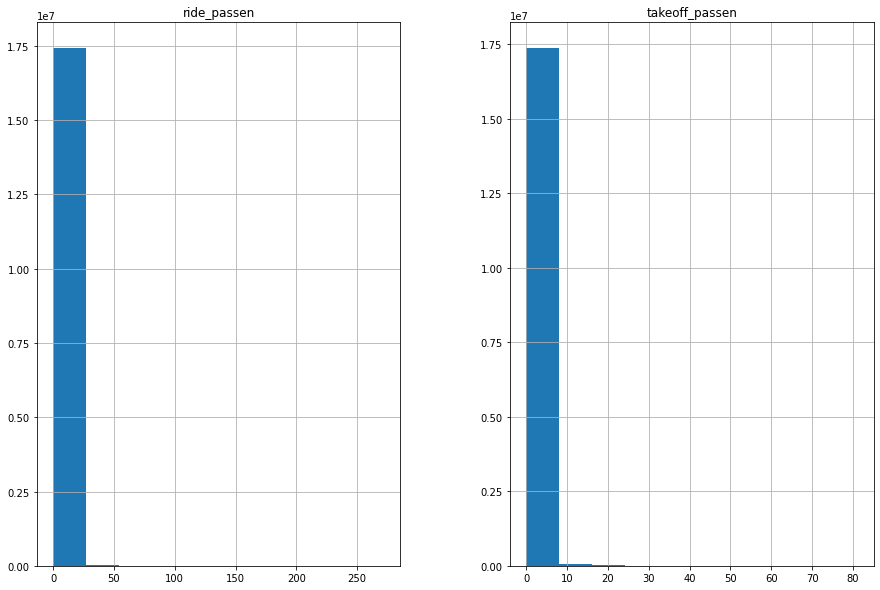

In [20]:
## 히스토그램
train_melt[['ride_passen', 'takeoff_passen']].hist()

In [21]:
train_melt[['ride_passen', 'takeoff_passen']].describe()

,ride_passen,takeoff_passen
count,1.744777e+07,1.744777e+07
mean,7.163604e-01,3.693364e-01
std,2.554076e+00,1.362143e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,2.720000e+02,8.100000e+01


* mean값과 50%(중위값) 차이가 크므로 왜곡정도가 심하다

In [22]:
## 로그변환
train_passen = train_melt[['ride_passen', 'takeoff_passen']]
train_passen['ride_passen_log'] = np.log1p(train_passen['ride_passen'])
train_passen['takeoff_passen_log'] = np.log1p(train_passen['takeoff_passen'])
train_passen.head(13)

,ride_passen,takeoff_passen,ride_passen_log,takeoff_passen_log
0,0.0,0.0,0.000000,0.000000
1,1.0,0.0,0.693147,0.000000
2,1.0,0.0,0.693147,0.000000
3,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000
7,1.0,0.0,0.693147,0.000000
8,0.0,0.0,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000


In [23]:
## 표준화
from sklearn.preprocessing import StandardScaler

train_passen = train_passen[['ride_passen_log', 'takeoff_passen_log']].values
train_passen_scaled = StandardScaler().fit_transform(train_passen)
train_passen_scaled

array([[-0.50058079, -0.40547239],
       [ 0.72676016, -0.40547239],
       [ 0.72676016, -0.40547239],
       ...,
       [-0.50058079, -0.40547239],
       [-0.50058079, -0.40547239],
       [-0.50058079, -0.40547239]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f990280f390>,
      dtype=object)

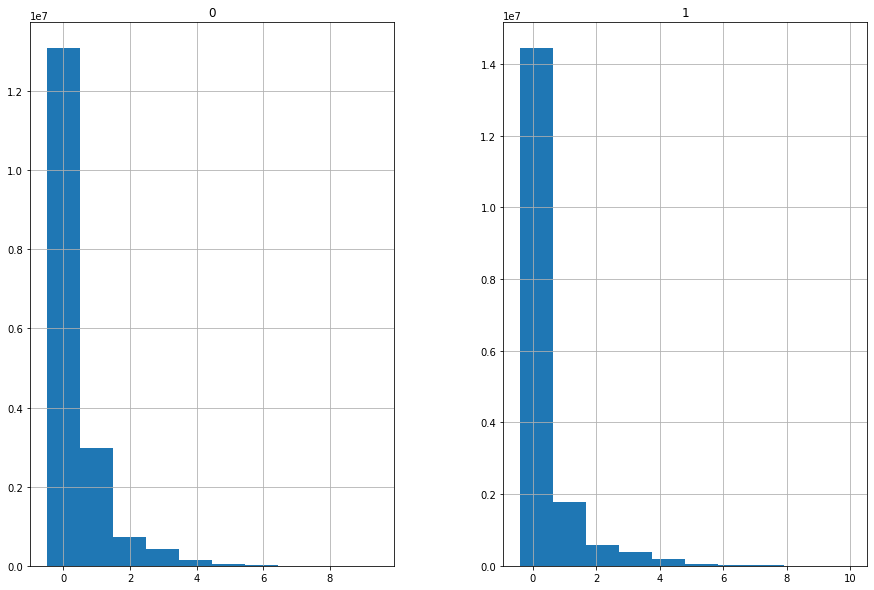

In [24]:
pd.DataFrame(train_passen_scaled).hist()

#### c. Kmeans(돌리지말 것)

##### 군집평가

In [ ]:
## Kmeans
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# ## K 정하기 (결과를 시각화해서 inertia 의 감소가 완만해지는 부분)
# wcss=[]
# ks = range(2,10)

# for k in ks:
#     kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=0).fit(train_passen_scaled)
#     wcss.append(kmeans.inertia_)
    
# plt.plot(ks, wcss) # 3 또는 5 선택

* 로그변환했을 때가 값이 더 균일하게 분배

In [ ]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*', 'p']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

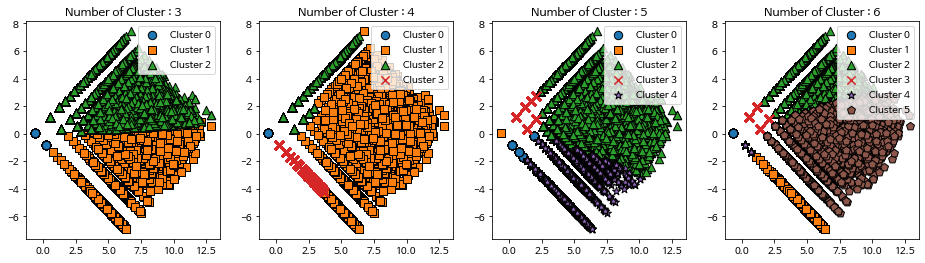

In [ ]:
visualize_kmeans_plot_multi([3,4,5,6], train_passen_scaled)

##### 모델학습 

In [ ]:
kmeans_result = train_melt.copy()

for i in range(3, 7):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans_labels = kmeans.fit_predict(train_passen_scaled)

  kmeans_result['kmeans_labels'+str(i)] = kmeans_labels

In [ ]:
print(kmeans_result.groupby('kmeans_labels3')['kmeans_labels3'].count())
print(kmeans_result.groupby('kmeans_labels4')['kmeans_labels4'].count())
print(kmeans_result.groupby('kmeans_labels5')['kmeans_labels5'].count())
print(kmeans_result.groupby('kmeans_labels6')['kmeans_labels6'].count())

kmeans_labels3
0    12797055
1     2064976
2     2585735
Name: kmeans_labels3, dtype: int64
kmeans_labels4
0    11079460
1      668479
2     2337964
3     3361863
Name: kmeans_labels4, dtype: int64
kmeans_labels5
0     2885717
1    11079460
2      508243
3     2156166
4      818180
Name: kmeans_labels5, dtype: int64
kmeans_labels6
0    11079460
1      934674
2      481130
3     1932911
4     2434181
5      585410
Name: kmeans_labels6, dtype: int64


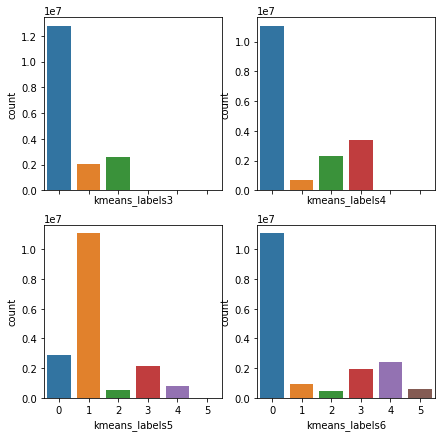

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)

sns.countplot('kmeans_labels3', data=kmeans_result, ax=axes[0, 0])
sns.countplot('kmeans_labels4', data=kmeans_result, ax=axes[0, 1])
sns.countplot('kmeans_labels5', data=kmeans_result, ax=axes[1, 0])
sns.countplot('kmeans_labels6', data=kmeans_result, ax=axes[1, 1])

In [ ]:
## 실루엣 스코어
# for j in range(3, 7):
#    average_score = silhouette_score(train_passen_scaled, kmeans_result['kmeans_labels'+str(i)])
#    print('군집이'+str(i)+'인 경우:  ', average_score)

#### d. DBSCAN

##### 랜덤샘플링

In [25]:
train_passen_scaled = pd.DataFrame(train_passen_scaled)
train_passen_scaled.shape

(17447766, 2)

In [26]:
train_scaled_sample = train_passen_scaled.sample(n=36500, random_state=1)
train_scaled_sample.shape

(36500, 2)

##### 모델학습 및 군집평가

In [27]:
from sklearn.cluster import DBSCAN

0.0


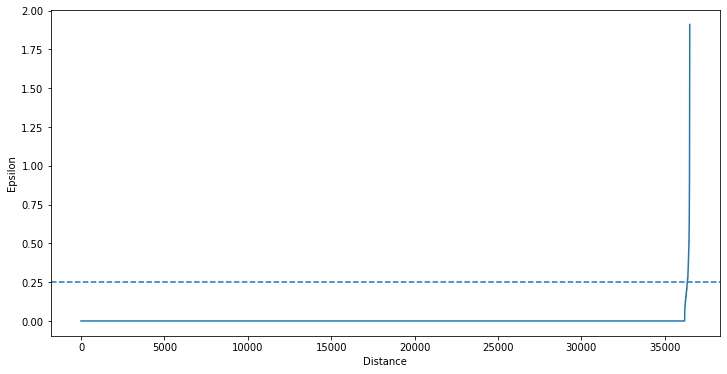

In [28]:
## 최적 파라미터
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5) # calculating distances
neigh.fit(train_scaled_sample)

distances, indices = neigh.kneighbors(train_scaled_sample) # indices and distance values

plt.figure(figsize=(12, 6))
plt.plot(np.sort(distances[:, 4])) # sorted distances
# plt.axvline(178, 0, 2, ls='--')
plt.axhline(0.25, 0, 200, ls='--')
plt.xlabel('Distance')
plt.ylabel('Epsilon')
print( np.sort(distances[:, 4])[178] ) #그래프가 급격히 상승하는 최적의 거리 epsilon를 선택

In [29]:
def visualize_dbscan_plot_multi(min_sample_list, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.cluster import DBSCAN
    import pandas as pd
    import numpy as np
    
    n_cols = len(min_sample_list)
    fig, axs = plt.subplots(figsize=(7*n_cols, 7), nrows=1, ncols=n_cols)

    for ind, min_samples in enumerate(min_sample_list):
        
        dbscan = DBSCAN(eps=1, min_samples=min_samples, metric='euclidean')
        cluster_labels = dbscan.fit_predict(X_features)
        X_features['cluster']=cluster_labels
        
        unique_labels = np.unique(dbscan.labels_)
        markers=['o', 's', '^', 'x', '*', 'p']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = X_features[X_features['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df[0], y=label_df[1], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(min_samples))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [30]:
dbscan = DBSCAN(eps=1, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(train_scaled_sample)

In [31]:
dbscan_cluster = train_scaled_sample.assign(cluster = dbscan_labels)

dbscan_result = dbscan_cluster.groupby('cluster')['cluster'].value_counts()
dbscan_result

cluster  cluster
-1       -1             6
 0        0         23053
 1        1          7137
 2        2          4204
 3        3          2100
Name: cluster, dtype: int64

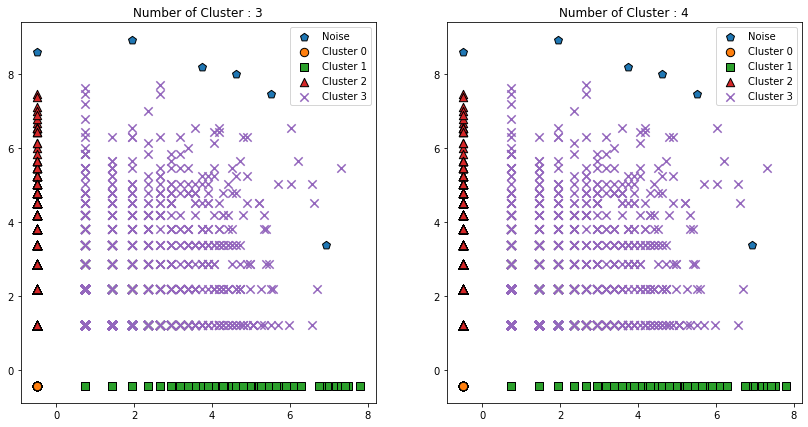

In [32]:
visualize_dbscan_plot_multi([3, 4], train_scaled_sample)

### (2) 각 집단의 특징 정의

In [33]:
## 샘플링된 행 인덱스 호출 후, 군집 라벨링 열 추가
sampling_index = dbscan_cluster.index
train_sam_clu = train_melt.iloc[sampling_index].assign(cluster = dbscan_labels)
train_sam_clu.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster
2940429,32468,2019-09-03,25000000,시내,2752,남원포구입구,33.27871,126.71777,2019-09-03,35,1,6~7_ride,0.0,7~8_takeoff,0.0,0
9550767,411461,2019-09-30,30040000,시내,319,연동주민센터,33.48731,126.49662,2019-09-30,39,0,7~8_ride,3.0,9~10_takeoff,0.0,1
7035840,389072,2019-09-29,23000000,시내,185,제원아파트,33.48753,126.48989,2019-09-29,38,6,8~9_ride,0.0,8~9_takeoff,1.0,2


In [132]:
train_sam_clu.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', 'date_dt', 'Week', 'Weekdays', 'x~y_ride',
       'ride_passen', 'x~y_takeoff', 'takeoff_passen', 'cluster'],
      dtype='object')

#### a. 모든 군집

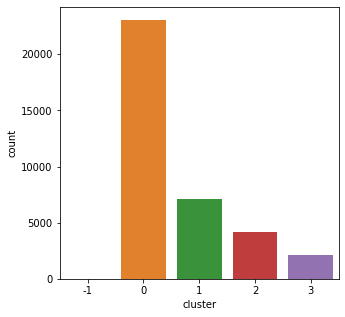

In [34]:
fig = plt.subplots(figsize=(5, 5))
sns.countplot('cluster', data=train_sam_clu)

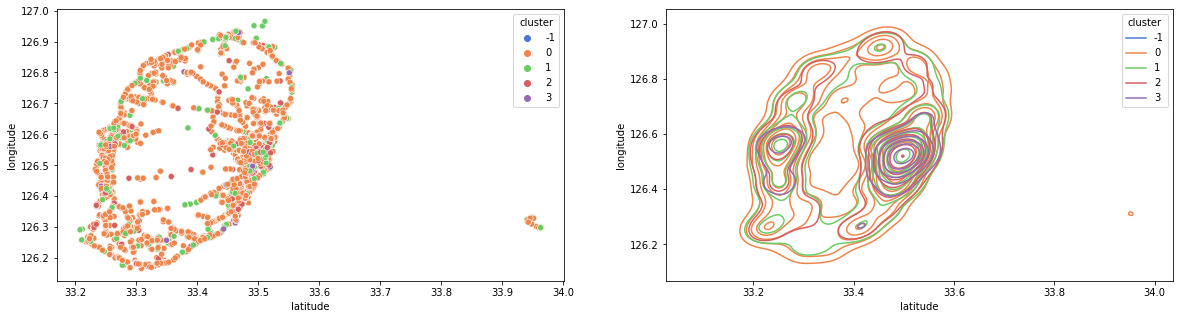

In [35]:
## 각 군집 별 분포 좌표
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))
sns.kdeplot(x ='latitude' , y = 'longitude', hue = 'cluster', data = train_sam_clu, palette='muted', ax=ax[1])
sns.scatterplot(x ='latitude' , y = 'longitude', hue = 'cluster', data = train_sam_clu, ax=ax[0], palette='muted')

In [36]:
## 크게보기
# sns.lmplot(x ='latitude' , y = 'longitude', hue = 'cluster', data = train_sam_clu, fit_reg = False, height=8, aspect=13/7)

Text(0.5, 0, '샘플링: 3군집')

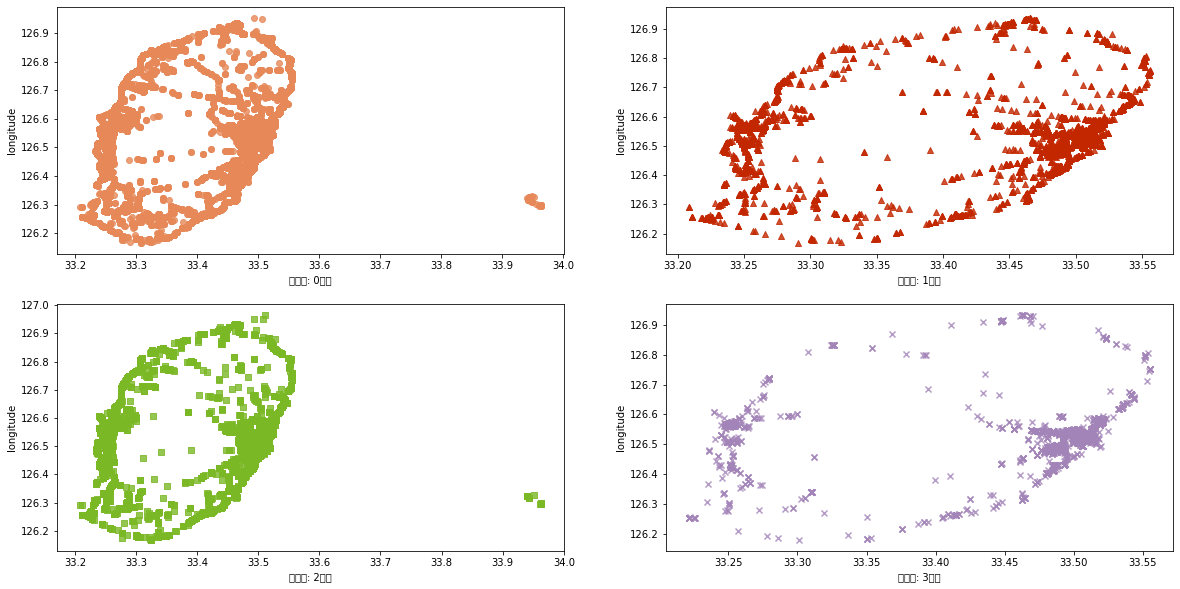

In [37]:
## 군집별 개별 분포 좌표
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==0], fit_reg=False, color='#E68858', ax=ax[0, 0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==1], fit_reg=False, color='#7BB825', marker='s', ax=ax[1, 0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==2], fit_reg=False, color='#C22700', marker='^', ax=ax[0, 1])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==3], fit_reg=False, color='#A384B8', marker='x', ax=ax[1, 1])
ax[0,0].set_xlabel('샘플링: 0군집')
ax[0,1].set_xlabel('샘플링: 1군집')
ax[1,0].set_xlabel('샘플링: 2군집')
ax[1,1].set_xlabel('샘플링: 3군집')

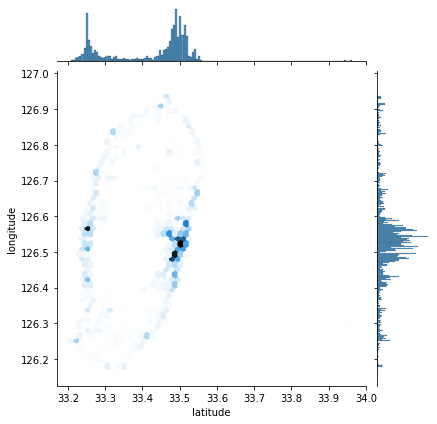

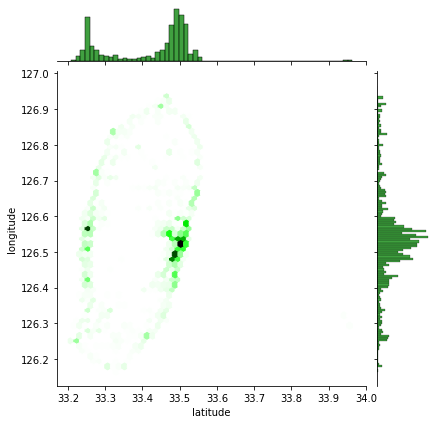

In [38]:
sns.jointplot(x='latitude', y='longitude', data=train, kind='hex')
sns.jointplot(x='latitude', y='longitude', data=train_sam_clu, kind='hex', color='green')

#### b. 군집 3번

In [39]:
print("군집 3에 해당하는 노선 ID는 ", train_sam_clu[train_sam_clu['cluster']==3].bus_route_id.nunique(), "개이다.")
print("군집 3에 해당하는 정류소 이름은 ", train_sam_clu[train_sam_clu['cluster']==3].station_name.nunique(), "개이다.")

군집 3에 해당하는 노선 ID는  251 개이다.
군집 3에 해당하는 정류소 이름은  507 개이다.


In [40]:
train_sam_clu[train_sam_clu['cluster']==3].groupby('in_out')['in_out'].count()

in_out
시내    2058
시외      42
Name: in_out, dtype: int64

In [41]:
## 주 차, 요일 별
# train_sam_clu[train_sam_clu['cluster']==3].groupby('Week')['Week'].count()
# train_sam_clu[train_sam_clu['cluster']==3].groupby('Weekdays')['Weekdays'].count()

   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



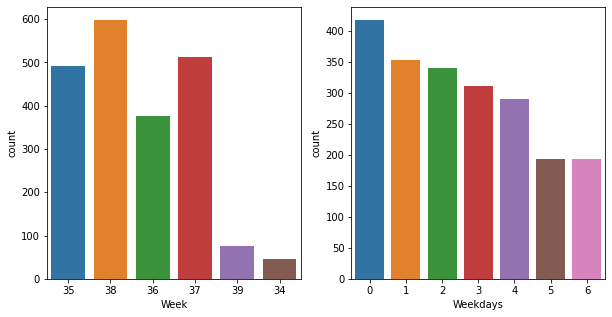

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot('Week', data=train_sam_clu[train_sam_clu['cluster']==3], ax=ax[0])
sns.countplot('Weekdays', data=train_sam_clu[train_sam_clu['cluster']==3], ax=ax[1])
print(calendar.month(2019, 9))

* 4, 5, 2, 3주차 순으로 많음 (1, 6주차는 제외) 즉, 보름 지난 후 많음
* 월, 화,..., 토, 일 순으로 3번 군집에 많음. 즉, 평일이 많음

In [43]:
## 시간대 별
# print(train_sam_clu[train_sam_clu['cluster']==3].groupby('x~y_ride')['ride_passen'].sum())
# print(train_sam_clu[train_sam_clu['cluster']==3].groupby('x~y_takeoff')['takeoff_passen'].sum())

[Text(0, 0, '8~9'),
 Text(0, 0, '7~8'),
 Text(0, 0, '6~7'),
 Text(0, 0, '9~10'),
 Text(0, 0, '11~12'),
 Text(0, 0, '10~11')]

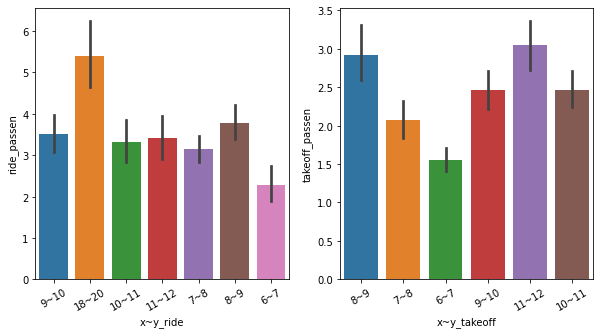

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='x~y_ride', y='ride_passen', data=train_sam_clu[train_sam_clu['cluster']==3], ax=ax[0])
sns.barplot('x~y_takeoff', y='takeoff_passen', data=train_sam_clu[train_sam_clu['cluster']==3], ax=ax[1])
ax[0].set_xticklabels(['9~10', '18~20', '10~11', '11~12', '7~8', '8~9', '6~7'], rotation=30)
ax[1].set_xticklabels(['8~9', '7~8', '6~7', '9~10', '11~12', '10~11'], rotation=30)

* 승차: 18-20(저녁), 8-9(아침), 9-10(늦은아침), 7-8(이른아침), 10-11(아점), 11-12(점심), 6-7(새벽아침)
* 하차: 8-9(아침), 11-12(점심), 10-11(아점), 9-10(늦은아침), 7-8(이른아침), 6-7(새벽아침)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f10c3d50>,
      dtype=object)

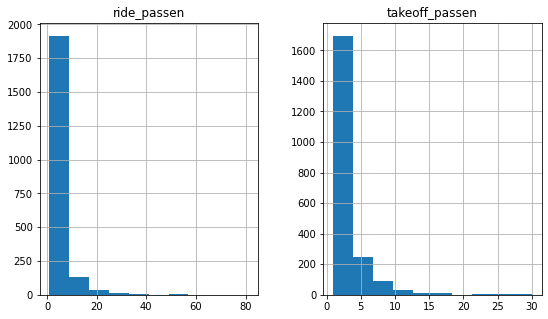

In [45]:
## 탑승인원
plt.rcParams["figure.figsize"] = (9, 5)
train_sam_clu[train_sam_clu['cluster']==3][['ride_passen', 'takeoff_passen']].hist()

Text(0.5, 0, '샘플링: 3군집')

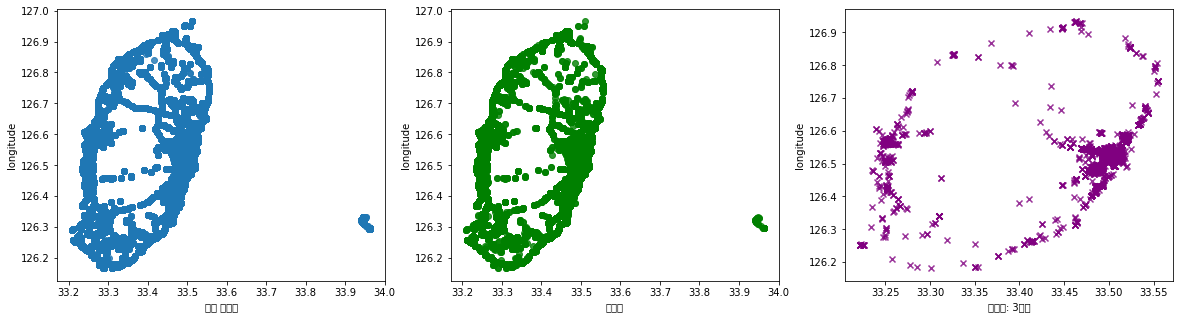

In [46]:
## 위도, 경도 좌표 산점도
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))
sns.regplot(x='latitude', y='longitude', data=train, fit_reg=False, ax=ax[0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu, fit_reg=False, color='green', ax=ax[1])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==3], fit_reg=False, color='purple', marker='x', ax=ax[2])

ax[0].set_xlabel('전체 데이터')
ax[1].set_xlabel('샘플링')
ax[2].set_xlabel('샘플링: 3군집')

In [95]:
## 군집 탑승인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==3].groupby('station_name')['ride_passen'].sum().sort_values(ascending=False).head(15)

station_name
제주시청(광양방면)          379.0
한라병원                324.0
제주버스터미널             218.0
제주도청신제주로터리          195.0
제주시청(아라방면)          184.0
중앙로터리(동)            173.0
용문사거리               162.0
시민회관                150.0
노형오거리               130.0
동광양                 123.0
연동주민센터              114.0
동문로터리(동문시장)         113.0
제주월드컵경기장서귀포버스터미널    103.0
인화초등학교              100.0
제주시외버스터미널            98.0
Name: ride_passen, dtype: float64

In [48]:
## 3 군집 전체 탑승인원 (7812.0)의 20%
print(train_sam_clu[train_sam_clu['cluster']==3]['ride_passen'].sum() * 20/100)
## 약 탑승객 20%가 많이 이용하는 정류장
print(1562-(379+324+218+195+184+173+162)) # 제주시청(광양방면), 한라병원, 제주버스터미널, 제주도청신제주로터리, 제주시청(아라방면), 중앙로터리(동)

1562.4

In [118]:
## 인기많은 정류장 선별 데이터프레임
# 약 탑승객 20%가 많이 이용하는 정류장
clu3_ride_popstation_20 = train_sam_clu[(train_sam_clu['cluster']==3) & \
              (train_sam_clu['station_name'].isin(['제주시청(광양방면)', '한라병원', '제주버스터미널', '제주도청신제주로터리', '제주시청(아라방면)', '중앙로터리(동)']))]
# 탑승인원이 100명 이상인 정류장
clu3_ride_popstation_100 = train_sam_clu[(train_sam_clu['cluster']==3) & \
              (train_sam_clu['station_name'].isin(['제주시청(광양방면)', '한라병원', '제주버스터미널', '제주도청신제주로터리', '제주시청(아라방면)', '중앙로터리(동)', '용문사거리', '시민회관', '노형오거리', '동광양', '연동주민센터', '동문로터리(동문시장)', '제주월드컵경기장서귀포버스터미널', '인화초등학교']))]
clu3_ride_popstation_100.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster
9632733,78004,2019-09-06,24300000,시내,320,제주도청신제주로터리,33.49143,126.49678,2019-09-06,35,4,8~9_ride,1.0,9~10_takeoff,1.0,3
14791027,251222,2019-09-19,24230000,시내,358,한라병원,33.48963,126.48600,2019-09-19,37,3,6~7_ride,1.0,11~12_takeoff,3.0,3
9154796,15490,2019-09-02,23550000,시내,320,제주도청신제주로터리,33.49143,126.49678,2019-09-02,35,0,7~8_ride,3.0,9~10_takeoff,1.0,3


In [142]:
## 인기많은 버스정류장 좌표 시각화
def popular_station(df, cluster):
  station_name_list = df.station_name.unique()
  markers=['h', 's', '^', 'x', '*', 'p', '+', '|', 'D', 'v', ',', 'H', '<', '>', '1', '2', '3', '4'] #18개

  fig = plt.subplots(figsize=(10, 8))
  sns.scatterplot(x='latitude', y='longitude', data=train_sam_clu, color='green')

  for i in range(len(station_name_list)):
    station_index = df[df['station_name']==station_name_list[i]]
    sns.scatterplot(x=station_index['latitude'], y=station_index['longitude'], s=100, edgecolor='k', marker=markers[i])

  plt.title('군집 {}의 승차 또는 하차 인원 100명 이상인 정류장'.format(str(cluster)))    
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


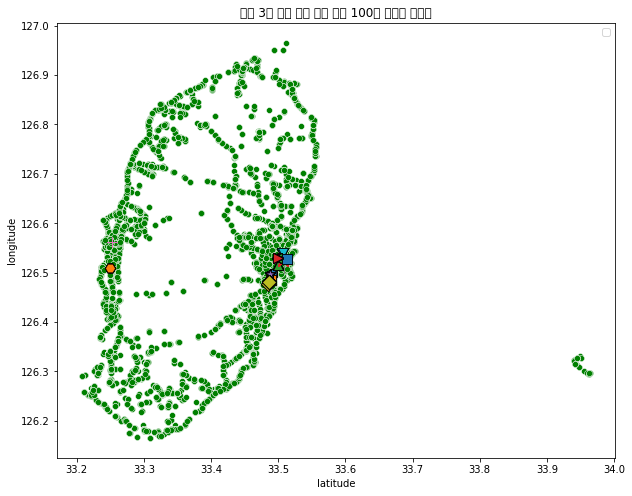

In [144]:
# ride_popular_station(clu3_ride_popstation_20)
popular_station(clu3_ride_popstation_100, 3)

In [134]:
## 군집 하차인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==3].groupby('station_name')['takeoff_passen'].sum().sort_values(ascending=False).head(30)

station_name
제주버스터미널           218.0
제주시청(광양방면)        171.0
한라병원              170.0
제주시청(아라방면)        153.0
제주도청신제주로터리        131.0
제주국제공항(구제주방면)     101.0
제주국제공항(신제주방면)      98.0
시민회관               86.0
연동주민센터             84.0
동문로터리(동문시장)        83.0
노형오거리              82.0
중앙로터리              73.0
제주대학교병원            63.0
제주지방법원(아라방면)       63.0
인화초등학교             62.0
제주버스터미널(종점)        62.0
동광양                60.0
중문환승정류장(중문우체국)     60.0
서문시장               59.0
중앙로(동문시장)          55.0
관덕정                51.0
광양                 50.0
서귀포시구시외버스터미널       45.0
중앙로터리(동)           45.0
용문사거리              43.0
원노형                42.0
탐라장애인종합복지관         41.0
천수동                40.0
문예회관               40.0
고산동산(광양방면)         38.0
Name: takeoff_passen, dtype: float64

In [123]:
# 하차인원이 100명 이상인 정류장
clu3_off_popstation_100 = train_sam_clu[(train_sam_clu['cluster']==3) & \
              (train_sam_clu['station_name'].isin(['제주버스터미널', '제주시청(광양방면)', '한라병원', '제주시청(아라방면)','제주도청신제주로터리', '제주국제공항(구제주방면)', '제주국제공항(신제주방면)']))]
clu3_off_popstation_100.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster
9632733,78004,2019-09-06,24300000,시내,320,제주도청신제주로터리,33.49143,126.49678,2019-09-06,35,4,8~9_ride,1.0,9~10_takeoff,1.0,3
6660964,14196,2019-09-02,23180000,시내,638,제주국제공항(구제주방면),33.50661,126.49345,2019-09-02,35,0,8~9_ride,1.0,8~9_takeoff,11.0,3
14791027,251222,2019-09-19,24230000,시내,358,한라병원,33.48963,126.48600,2019-09-19,37,3,6~7_ride,1.0,11~12_takeoff,3.0,3


No handles with labels found to put in legend.


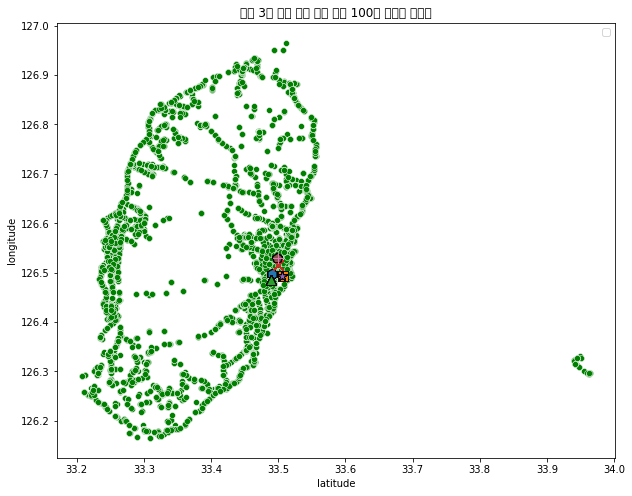

In [145]:
popular_station(clu3_off_popstation_100, 3)

#### c. 군집 0번

In [55]:
print("군집 0에 해당하는 노선 ID는 ", train_sam_clu[train_sam_clu['cluster']==0].bus_route_id.nunique(), "개이다.")
print("군집 0에 해당하는 정류소 이름은 ", train_sam_clu[train_sam_clu['cluster']==0].station_name.nunique(), "개이다.")

군집 0에 해당하는 노선 ID는  585 개이다.
군집 0에 해당하는 정류소 이름은  1778 개이다.


In [56]:
train_sam_clu[train_sam_clu['cluster']==0].groupby('in_out')['in_out'].count()

in_out
시내    22692
시외      361
Name: in_out, dtype: int64

In [57]:
## 주 차, 요일 별
# train_sam_clu[train_sam_clu['cluster']==0].groupby('Week')['Week'].count()
# train_sam_clu[train_sam_clu['cluster']==0].groupby('Weekdays')['Weekdays'].count()

   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



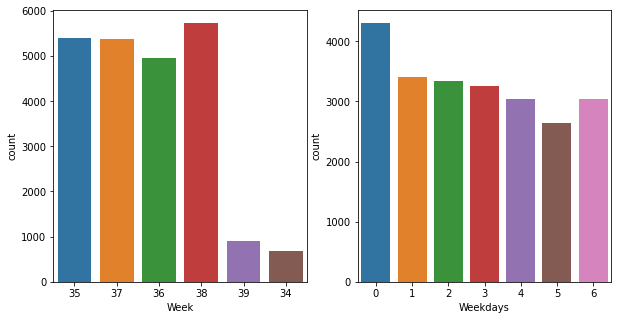

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot('Week', data=train_sam_clu[train_sam_clu['cluster']==0], ax=ax[0])
sns.countplot('Weekdays', data=train_sam_clu[train_sam_clu['cluster']==0], ax=ax[1])
print(calendar.month(2019, 9))

In [63]:
## 시간대 별
print(train_sam_clu[train_sam_clu['cluster']==0].groupby('x~y_ride')['ride_passen'].sum())
print(train_sam_clu[train_sam_clu['cluster']==0].groupby('x~y_takeoff')['takeoff_passen'].sum())

x~y_ride
10~11_ride    0.0
11~12_ride    0.0
18~20_ride    0.0
6~7_ride      0.0
7~8_ride      0.0
8~9_ride      0.0
9~10_ride     0.0
Name: ride_passen, dtype: float64
x~y_takeoff
10~11_takeoff    0.0
11~12_takeoff    0.0
6~7_takeoff      0.0
7~8_takeoff      0.0
8~9_takeoff      0.0
9~10_takeoff     0.0
Name: takeoff_passen, dtype: float64


[Text(0, 0, '8~9'),
 Text(0, 0, '7~8'),
 Text(0, 0, '6~7'),
 Text(0, 0, '9~10'),
 Text(0, 0, '11~12'),
 Text(0, 0, '10~11')]

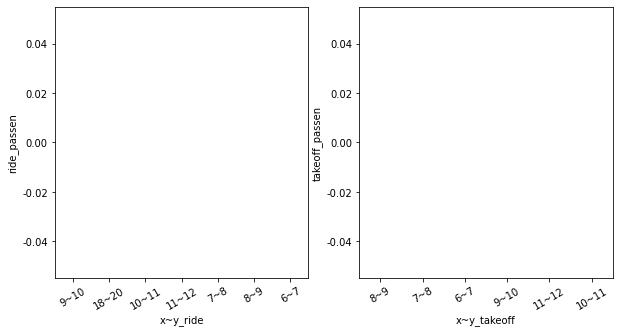

In [60]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='x~y_ride', y='ride_passen', data=train_sam_clu[train_sam_clu['cluster']==0], ax=ax[0])
sns.barplot('x~y_takeoff', y='takeoff_passen', data=train_sam_clu[train_sam_clu['cluster']==0], ax=ax[1])
ax[0].set_xticklabels(['9~10', '18~20', '10~11', '11~12', '7~8', '8~9', '6~7'], rotation=30)
ax[1].set_xticklabels(['8~9', '7~8', '6~7', '9~10', '11~12', '10~11'], rotation=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98f46d0850>,
      dtype=object)

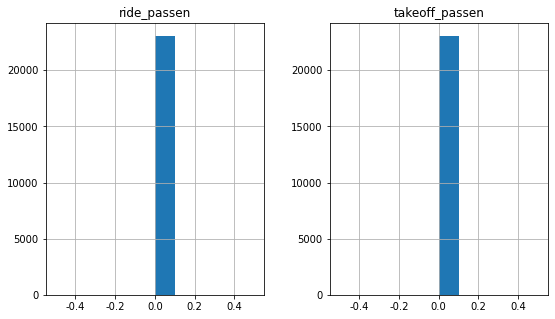

In [61]:
## 탑승인원
plt.rcParams["figure.figsize"] = (9, 5)
train_sam_clu[train_sam_clu['cluster']==0][['ride_passen', 'takeoff_passen']].hist()

In [73]:
# train_sam_clu[(train_sam_clu['cluster']==0)&(train_sam_clu['ride_passen']!=0)]
# train_sam_clu[(train_sam_clu['cluster']==0)&(train_sam_clu['takeoff_passen']!=0)]

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster


Text(0.5, 0, '샘플링: 0군집')

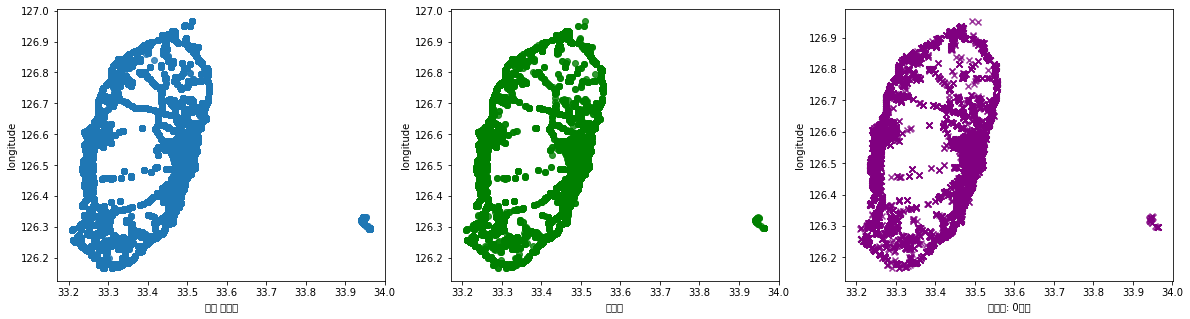

In [62]:
## 위도, 경도 좌표 산점도
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))
sns.regplot(x='latitude', y='longitude', data=train, fit_reg=False, ax=ax[0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu, fit_reg=False, color='green', ax=ax[1])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==0], fit_reg=False, color='purple', marker='x', ax=ax[2])

ax[0].set_xlabel('전체 데이터')
ax[1].set_xlabel('샘플링')
ax[2].set_xlabel('샘플링: 0군집')

In [136]:
## 군집 탑승인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==0].groupby('station_name')['ride_passen'].sum().sort_values(ascending=False).head(30)

station_name
히귀반석        0.0
사라마을        0.0
비자림로교래입구    0.0
사가동         0.0
사거리         0.0
사계리동동       0.0
사계리사무소      0.0
사계리서동       0.0
사계어촌체험어장    0.0
사계용해경로당     0.0
사농동산        0.0
사대부고        0.0
사동복지회관      0.0
사라봉         0.0
비안동         0.0
사라봉경로당입구    0.0
사라봉오거리      0.0
사려니마을       0.0
사려니숲길       0.0
사평마을        0.0
사평마을입구      0.0
사회복지법인춘강    0.0
산굼부리        0.0
산남내         0.0
산남새마을금고     0.0
산방복지회관      0.0
비자림         0.0
비석동         0.0
산양곶자왈       0.0
부영아파트       0.0
Name: ride_passen, dtype: float64

In [137]:
train_sam_clu[train_sam_clu['cluster']==0].groupby('station_name')['takeoff_passen'].sum().sort_values(ascending=False).head(30)

station_name
히귀반석        0.0
사라마을        0.0
비자림로교래입구    0.0
사가동         0.0
사거리         0.0
사계리동동       0.0
사계리사무소      0.0
사계리서동       0.0
사계어촌체험어장    0.0
사계용해경로당     0.0
사농동산        0.0
사대부고        0.0
사동복지회관      0.0
사라봉         0.0
비안동         0.0
사라봉경로당입구    0.0
사라봉오거리      0.0
사려니마을       0.0
사려니숲길       0.0
사평마을        0.0
사평마을입구      0.0
사회복지법인춘강    0.0
산굼부리        0.0
산남내         0.0
산남새마을금고     0.0
산방복지회관      0.0
비자림         0.0
비석동         0.0
산양곶자왈       0.0
부영아파트       0.0
Name: takeoff_passen, dtype: float64

#### d. 군집 1번

In [75]:
print("군집 1에 해당하는 노선 ID는 ", train_sam_clu[train_sam_clu['cluster']==1].bus_route_id.nunique(), "개이다.")
print("군집 1에 해당하는 정류소 이름은 ", train_sam_clu[train_sam_clu['cluster']==1].station_name.nunique(), "개이다.")

군집 1에 해당하는 노선 ID는  524 개이다.
군집 1에 해당하는 정류소 이름은  1234 개이다.


In [76]:
train_sam_clu[train_sam_clu['cluster']==1].groupby('in_out')['in_out'].count()

in_out
시내    6996
시외     141
Name: in_out, dtype: int64

In [77]:
## 주 차, 요일 별
# train_sam_clu[train_sam_clu['cluster']==1].groupby('Week')['Week'].count()
# train_sam_clu[train_sam_clu['cluster']==1].groupby('Weekdays')['Weekdays'].count()

   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



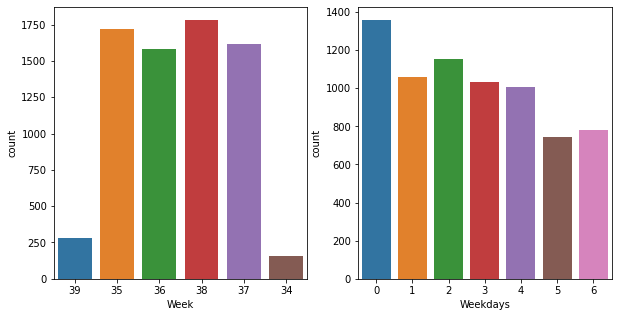

In [78]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot('Week', data=train_sam_clu[train_sam_clu['cluster']==1], ax=ax[0])
sns.countplot('Weekdays', data=train_sam_clu[train_sam_clu['cluster']==1], ax=ax[1])
print(calendar.month(2019, 9))

In [79]:
## 시간대 별
# print(train_sam_clu[train_sam_clu['cluster']==1].groupby('x~y_ride')['ride_passen'].sum())
# print(train_sam_clu[train_sam_clu['cluster']==1].groupby('x~y_takeoff')['takeoff_passen'].sum())

[Text(0, 0, '8~9'),
 Text(0, 0, '7~8'),
 Text(0, 0, '6~7'),
 Text(0, 0, '9~10'),
 Text(0, 0, '11~12'),
 Text(0, 0, '10~11')]

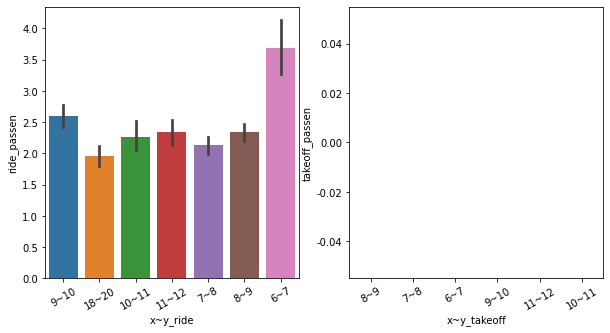

In [80]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='x~y_ride', y='ride_passen', data=train_sam_clu[train_sam_clu['cluster']==1], ax=ax[0])
sns.barplot('x~y_takeoff', y='takeoff_passen', data=train_sam_clu[train_sam_clu['cluster']==1], ax=ax[1])
ax[0].set_xticklabels(['9~10', '18~20', '10~11', '11~12', '7~8', '8~9', '6~7'], rotation=30)
ax[1].set_xticklabels(['8~9', '7~8', '6~7', '9~10', '11~12', '10~11'], rotation=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ec5aaad0>,
      dtype=object)

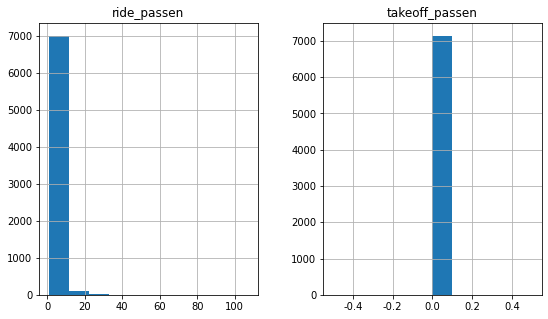

In [81]:
## 탑승인원
plt.rcParams["figure.figsize"] = (9, 5)
train_sam_clu[train_sam_clu['cluster']==1][['ride_passen', 'takeoff_passen']].hist()

Text(0.5, 0, '샘플링: 1군집')

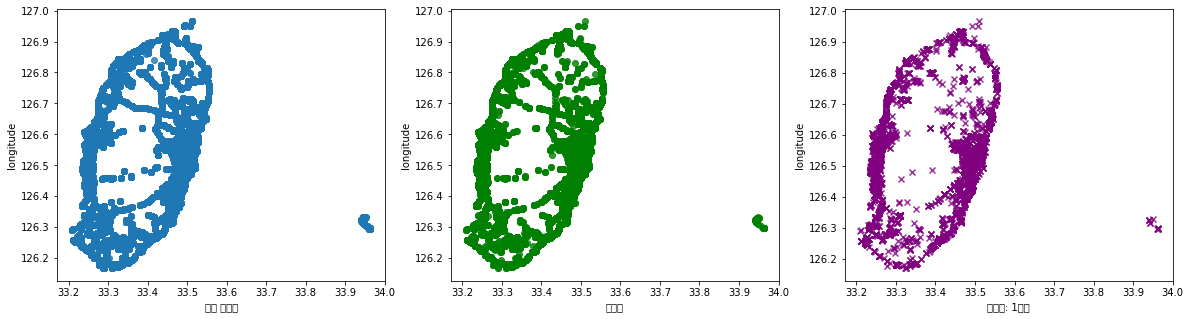

In [82]:
## 위도, 경도 좌표 산점도
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))
sns.regplot(x='latitude', y='longitude', data=train, fit_reg=False, ax=ax[0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu, fit_reg=False, color='green', ax=ax[1])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==1], fit_reg=False, color='purple', marker='x', ax=ax[2])

ax[0].set_xlabel('전체 데이터')
ax[1].set_xlabel('샘플링')
ax[2].set_xlabel('샘플링: 1군집')

In [106]:
## 군집 탑승인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==1].groupby('station_name')['ride_passen'].sum().sort_values(ascending=False).head(35)

station_name
제주시외버스터미널             446.0
제주대학교                 248.0
노형오거리                 197.0
화북남문                  188.0
한라병원                  187.0
시외버스출발지(가상정류소)        175.0
제주도청신제주로터리            175.0
제주시청(아라방면)            175.0
삼무공원사거리               153.0
천수동                   148.0
큰동네                   144.0
동문로터리(동문시장)           144.0
제주고등학교/중흥S클래스         136.0
제주여자상업고등학교            129.0
제주대학교병원               129.0
중앙로터리(동)              125.0
서귀포시구시외버스터미널          123.0
제주동초등학교               122.0
화북휴먼시아                122.0
제주한라대학교               121.0
인화초등학교                119.0
아라주공아파트               118.0
제주시청(광양방면)            117.0
구터미널                  111.0
동광양                   110.0
한국병원                  106.0
정존마을                  106.0
고산동산(광양방면)            104.0
제주국제공항(대정,화순,일주서로)    103.0
관덕정                   102.0
표선환승정류장(표선면사무소)       101.0
함덕환승정류장(함덕해수욕장)       101.0
제주버스터미널               100.0
제주중앙여자고등학교(광양방면)       97.0
남서광마을입구                95.0
Name: r

In [149]:
## 인기많은 정류장 선별 데이터프레임
# 탑승인원이 100명 이상인 정류장
clu1_ride_popstation_100 = train_sam_clu[(train_sam_clu['cluster']==1) & \
              (train_sam_clu['station_name'].isin(['제주시외버스터미널', '제주대학교', '노형오거리', '화북남문', '한라병원', '시외버스출발지(가상정류소)', '제주도청신제주로터리', '제주시청(아라방면)', '삼무공원사거리' , '천수동', '큰동네', '동문로터리(동문시장)', '제주고등학교/중흥S클래스', '제주여자상업고등학교', '제주대학교병원', '중앙로터리(동) ', '서귀포시구시외버스터미널', '제주동초등학교']))]
clu1_ride_popstation_100.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster
5908052,92130,2019-09-07,24340000,시외,391,삼무공원사거리,33.48990,126.48892,2019-09-07,35,5,6~7_ride,1.0,8~9_takeoff,0.0,1
16488523,287026,2019-09-21,31340000,시내,1565,시외버스출발지(가상정류소),33.49946,126.51478,2019-09-21,37,5,10~11_ride,2.0,11~12_takeoff,0.0,1
3925276,186469,2019-09-14,32350000,시내,292,천수동,33.50934,126.54257,2019-09-14,36,5,8~9_ride,3.0,7~8_takeoff,0.0,1


No handles with labels found to put in legend.


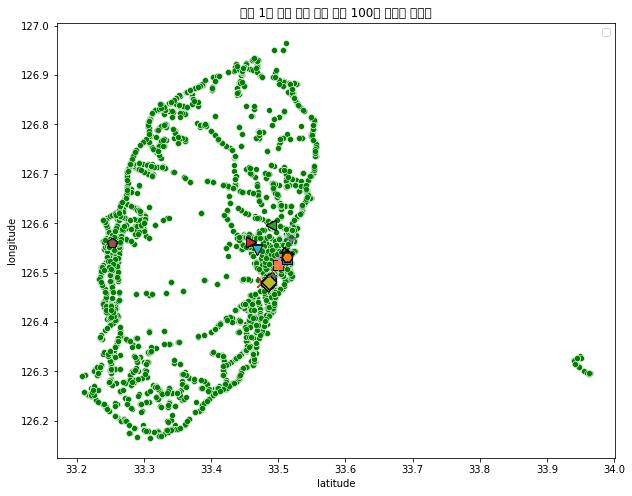

In [150]:
popular_station(clu1_ride_popstation_100, 1)

In [141]:
## 군집 하차인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==1].groupby('station_name')['takeoff_passen'].sum().sort_values(ascending=False).head(30)

station_name
히귀반석           0.0
산천단한국폴리텍대학     0.0
산양리            0.0
산양리감귤선과장       0.0
산여리통입구         0.0
산이수동           0.0
산지물            0.0
산지변전소          0.0
산천단            0.0
삼남내            0.0
삼무공원사거리        0.0
삼다체육공원입구       0.0
삼달1리           0.0
삼달1리삼달보건진료소    0.0
삼달교차로          0.0
삼담우체국          0.0
삼도119센터        0.0
삼도1동주민센터       0.0
산방산            0.0
산방복지회관         0.0
산남새마을금고        0.0
산남내            0.0
사계리동동          0.0
사계리사무소         0.0
사계리서동          0.0
사계용해경로당        0.0
사대부고           0.0
사동복지회관         0.0
사라마을           0.0
사라봉            0.0
Name: takeoff_passen, dtype: float64

#### e. 군집 2번

In [86]:
print("군집 2에 해당하는 노선 ID는 ", train_sam_clu[train_sam_clu['cluster']==2].bus_route_id.nunique(), "개이다.")
print("군집 2에 해당하는 정류소 이름은 ", train_sam_clu[train_sam_clu['cluster']==2].station_name.nunique(), "개이다.")

군집 2에 해당하는 노선 ID는  513 개이다.
군집 2에 해당하는 정류소 이름은  1042 개이다.


In [152]:
train_sam_clu[train_sam_clu['cluster']==2].groupby('in_out')['in_out'].count()

in_out
시내    4132
시외      72
Name: in_out, dtype: int64

In [88]:
## 주 차, 요일 별
# train_sam_clu[train_sam_clu['cluster']==2].groupby('Week')['Week'].count()
# train_sam_clu[train_sam_clu['cluster']==2].groupby('Weekdays')['Weekdays'].count()

   September 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30



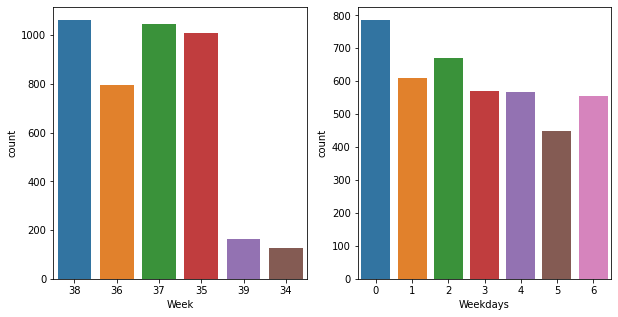

In [89]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot('Week', data=train_sam_clu[train_sam_clu['cluster']==2], ax=ax[0])
sns.countplot('Weekdays', data=train_sam_clu[train_sam_clu['cluster']==2], ax=ax[1])
print(calendar.month(2019, 9))

In [90]:
## 시간대 별
# print(train_sam_clu[train_sam_clu['cluster']==2].groupby('x~y_ride')['ride_passen'].sum())
# print(train_sam_clu[train_sam_clu['cluster']==2].groupby('x~y_takeoff')['takeoff_passen'].sum())

[Text(0, 0, '8~9'),
 Text(0, 0, '7~8'),
 Text(0, 0, '6~7'),
 Text(0, 0, '9~10'),
 Text(0, 0, '11~12'),
 Text(0, 0, '10~11')]

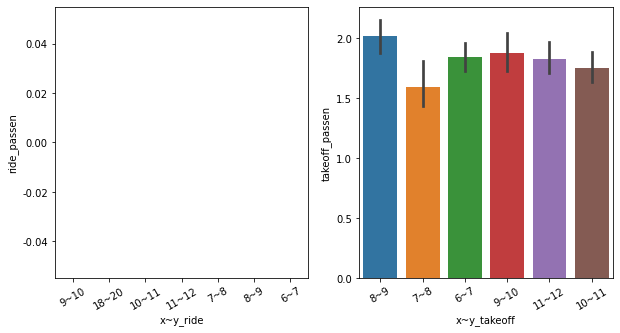

In [91]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='x~y_ride', y='ride_passen', data=train_sam_clu[train_sam_clu['cluster']==2], ax=ax[0])
sns.barplot('x~y_takeoff', y='takeoff_passen', data=train_sam_clu[train_sam_clu['cluster']==2], ax=ax[1])
ax[0].set_xticklabels(['9~10', '18~20', '10~11', '11~12', '7~8', '8~9', '6~7'], rotation=30)
ax[1].set_xticklabels(['8~9', '7~8', '6~7', '9~10', '11~12', '10~11'], rotation=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98ec11b650>,
      dtype=object)

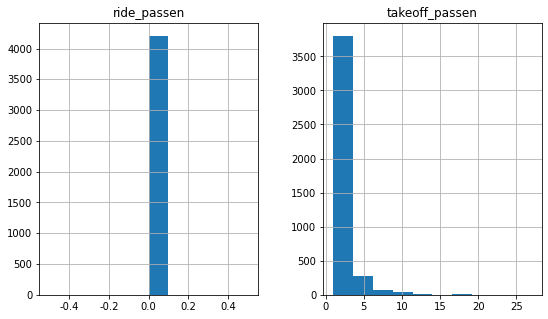

In [92]:
## 탑승인원
plt.rcParams["figure.figsize"] = (9, 5)
train_sam_clu[train_sam_clu['cluster']==2][['ride_passen', 'takeoff_passen']].hist()

Text(0.5, 0, '샘플링: 2군집')

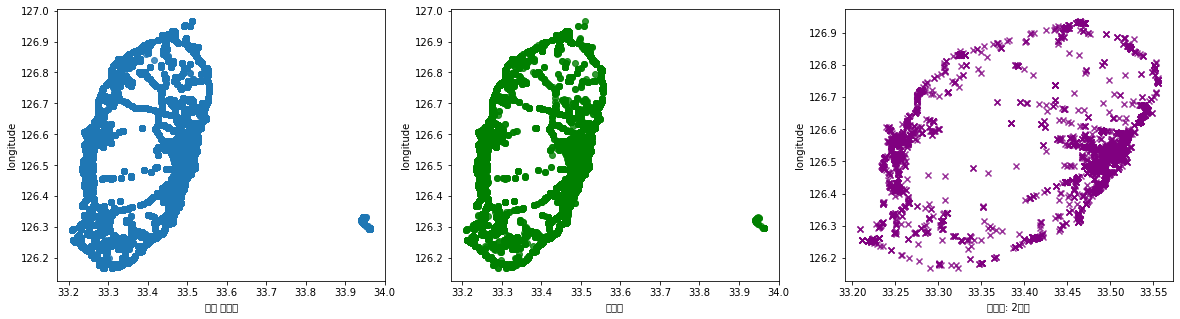

In [93]:
## 위도, 경도 좌표 산점도
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))
sns.regplot(x='latitude', y='longitude', data=train, fit_reg=False, ax=ax[0])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu, fit_reg=False, color='green', ax=ax[1])
sns.regplot(x='latitude', y='longitude', data=train_sam_clu[train_sam_clu['cluster']==2], fit_reg=False, color='purple', marker='x', ax=ax[2])

ax[0].set_xlabel('전체 데이터')
ax[1].set_xlabel('샘플링')
ax[2].set_xlabel('샘플링: 2군집')

In [139]:
## 군집 승차인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==2].groupby('station_name')['ride_passen'].sum().sort_values(ascending=False).head(30)

station_name
히귀반석         0.0
산이수동         0.0
산여리통입구       0.0
산방산          0.0
산방복지회관       0.0
산남내          0.0
산굼부리         0.0
사회복지법인춘강     0.0
사평마을         0.0
사려니숲길        0.0
사려니마을        0.0
사라봉오거리       0.0
사라봉          0.0
사동복지회관       0.0
사대부고         0.0
사계어촌체험어장     0.0
사계리서동        0.0
사계리사무소       0.0
사계리동동        0.0
사거리          0.0
사가동          0.0
비자림          0.0
비안동          0.0
비석동          0.0
비석거리         0.0
브릭캠퍼스        0.0
붉은오름휴양림입구    0.0
붉은오름         0.0
북촌리해동        0.0
북촌리          0.0
Name: ride_passen, dtype: float64

In [138]:
## 군집 하차인원 많은 정류장 TOP 10
train_sam_clu[train_sam_clu['cluster']==2].groupby('station_name')['takeoff_passen'].sum().sort_values(ascending=False).head(30)

station_name
제주국제공항(종점)          238.0
제주버스터미널(종점)         182.0
제주버스터미널             131.0
제주시외버스터미널(종점)       129.0
제주대학교병원              84.0
한라병원                 81.0
제주대학교                77.0
동문로터리(동문시장)          74.0
제주도청신제주로터리           71.0
제주대학교입구              64.0
한국병원                 62.0
동광양                  62.0
노형오거리                61.0
제주중앙여자고등학교(아라방면)     60.0
천수동                  56.0
제주시청(아라방면)           55.0
하귀초등학교               53.0
한림환승정류장(한림리)         53.0
화북남문                 52.0
제주국제공항(구제주방면)        49.0
화북초등학교               48.0
성산항                  48.0
성산일출봉입구              48.0
서귀포시외버스터미널           46.0
제주동중학교               46.0
서귀포시구시외버스터미널         46.0
광양사거리                45.0
삼무공원사거리              45.0
함덕환승정류장(함덕해수욕장)      44.0
제주지방법원(아라방면)         44.0
Name: takeoff_passen, dtype: float64

In [129]:
## 인기많은 정류장 선별 데이터프레임
# 탑승인원이 100명 이상인 정류장
clu2_ride_popstation_100 = train_sam_clu[(train_sam_clu['cluster']==2) & \
              (train_sam_clu['station_name'].isin(['제주시청(광양방면)', '한라병원', '제주버스터미널', '제주도청신제주로터리', '제주시청(아라방면)', '중앙로터리(동)']))]
clu2_ride_popstation_100.head(3)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,cluster
56410,56410,2019-09-04,32510000,시내,3271,제주시청(광양방면),33.49892,126.53035,2019-09-04,35,2,6~7_ride,0.0,6~7_takeoff,1.0,2
1270017,23748,2019-09-02,31160000,시내,321,제주도청신제주로터리,33.49110,126.49647,2019-09-02,35,0,9~10_ride,0.0,6~7_takeoff,2.0,2
13799961,91002,2019-09-07,23610000,시내,321,제주도청신제주로터리,33.49110,126.49647,2019-09-07,35,5,11~12_ride,0.0,10~11_takeoff,3.0,2


No handles with labels found to put in legend.


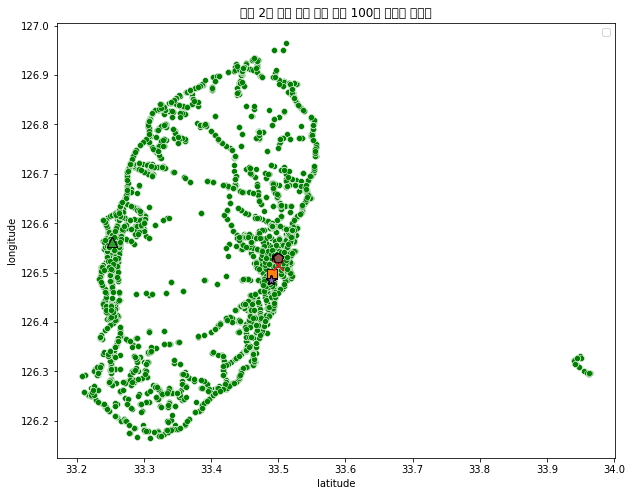

In [151]:
popular_station(clu2_ride_popstation_100, 2)

# 새 섹션

# 낙서장 메모장

## 메모장
- 언제(시간, 요일) 승차인원이 많아지는지 ==> 무슨 날인가
- 하차 인원이 유난히 많이 찍힌 버스는 환승? ==> [358660] / 공통점 찾기(특정 장소 정류소나 사거리)
- 장소 관광지인지 분류 인코딩
- x, y좌표 찍기
- 관광코스 중심 버스노선이 있는지
- bus_bts는 버스카드 아이디 별이니까 확실히 관광객인 사람, 거주인인 사람 반확정짓기
- 관광지 밀집도 지도 히트맵
- 버스루트 아이디별로 관광지가 많은 루트 분류

In [ ]:
aggs = {'in_out':'count', 'Week':'count', 'Weekdays':'count', 'x~y_ride':'count', 'x~y_takeoff':'count'}
train_sam_clu[train_sam_clu['cluster']==3].groupby('in_out').agg(aggs)

In [ ]:
kmeans_cluster4 = kmeans_result.drop(['kmeans_labels3', 'kmeans_labels5', 'kmeans_labels6'], axis=1)
kmeans_cluster4.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,date_dt,Week,Weekdays,x~y_ride,ride_passen,x~y_takeoff,takeoff_passen,kmeans_labels4
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0,0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0,3
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,2019-09-01,34,6,6~7_ride,1.0,6~7_takeoff,0.0,3
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0,0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,2019-09-01,34,6,6~7_ride,0.0,6~7_takeoff,0.0,0


## [2] 휴일(추석)에 해당되는 데이터 분석

* 추석에 이어지는 주말인 15일 포함
* 개천절, 한글날은 연속휴일이 아니므로 애매한 데이터일 것 같아서 보류, 수요일 저녁 타임도 보류 

#### (1) 휴일(추석)에 해당되는 데이터 추출

In [ ]:
## 추석
train_holiday = train[(train['date']>='2019-09-12') & (train['date']<='2019-09-15')]
bus_bts_holiday = bus_bts[(bus_bts['geton_date']>='2019-09-12') & (bus_bts['geton_date']<='2019-09-15')]
print(train_holiday.tail())
print(train_holiday.shape)

In [ ]:
bus_bts_holiday.tail()

In [ ]:
train_holiday.Weekdays.unique()

## [2] 휴일 승하차 인구 클러스터링

* date: 15, 16, 17, 18, 19로 인코딩
* bus_route_id
* in_out: 0, 1로 인코딩
* station_code: station_name은 같은 맞은편 장소라도 이름이 다르므로 제외
* latitude,	longitude: 좌표 제외
* 

## [2] 승하차 인원이 많은 정류소(노선), 시간, ID 파악 

### (1) 정류소(노선)

In [ ]:
## train
# 시간 별이 아니므로 6시~12까지 전부 합치기(열 덧셈)
train_holiday['x~y_ride'] = train_holiday['6~7_ride']+train_holiday['7~8_ride']+train_holiday['8~9_ride']+train_holiday['9~10_ride']+train_holiday['10~11_ride']+train_holiday['11~12_ride']
train_holiday['x~y_takeoff'] = train_holiday['6~7_takeoff']+train_holiday['7~8_takeoff']+train_holiday['8~9_takeoff']+train_holiday['9~10_takeoff']+train_holiday['10~11_takeoff']+train_holiday['11~12_takeoff']

train_station_name_value_ride = train_holiday.groupby(['station_name'])['x~y_ride'].count()
train_station_name_value_takeoff = train_holiday.groupby(['station_name'])['x~y_takeoff'].sum()

train_station_name_value_ride#.head(15)

In [ ]:
## train에서 추석기간동안 승하차가 많은 순위
bus_bts_station_name_value = bus_bts_holiday['geton_station_name'].value_counts()
bus_bts_station_name_value.head(15)

In [ ]:
bus_bts_holiday['getoff_station_name'].value_counts().head(15)

In [ ]:
## 만석을 채운 시간대
crowd67 = train_holiday[(train_holiday['6~7_ride']>=27) | (train_holiday['7~8_ride']>=27) | (train_holiday['8~9_ride']>=27) | (train_holiday['9~10_ride']>=27) | (train_holiday['10~11_ride']>=27) | (train_holiday['11~12_ride']>=27)]
crowd67.shape

In [ ]:
fig.savefig('그림.png')